# ![Keras](https://img.shields.io/badge/Keras-%23D00000.svg?style=for-the-badge&logo=Keras&logoColor=white) **TRAINING DEEP NEURAL NETWORKS - EXERCISES**

---

## **SETUP:**

In [1]:
# %load ../initial_settings.py
"""
Initial settings for data analysis and machine learning.
Use this with: %load ../initial_settings.py
"""

import os
import sys
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
from packaging import version

# This notebook requires Python 3.7 or above and Scikit-Learn 1.0.1 or above.
assert sys.version_info >= (3, 7)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# And TensorFlow 2.8 or above.
assert version.parse(tf.__version__) >= version.parse("2.8.0")

# Graphviz source.
os.environ["PATH"] += os.pathsep + "C:/Programy/Graphviz/bin/"

# Default settings for matplotlib.
DARK_BLUE = "#03002e"
LIGHT_GRAY = "#8f8f99"

plt.rc("font", size=14)
plt.rc("legend", fontsize=14)
plt.rc("text", color=DARK_BLUE)

plt.rc("axes", labelsize=14)
plt.rc("axes", titlesize=14)
plt.rc("axes", labelpad=10)
plt.rc("axes", labelcolor=DARK_BLUE)
plt.rc("axes", grid=True)

plt.rc("xtick", labelsize=12, color=DARK_BLUE)
plt.rc("ytick", labelsize=12, color=DARK_BLUE)
plt.rc("xtick.major", pad=10)
plt.rc("ytick.major", pad=10)

plt.rc("grid", color=LIGHT_GRAY)
plt.rc("grid", linestyle="dashed")
plt.rc("grid", linewidth=0.5)
plt.rc("grid", alpha=0.5)

# Create a directory for matplotlib images.
IMAGES_PATH = Path("images")
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(
    fig_id, tight_layout=True, fig_extension="png", resolution=300, facecolor="w"
):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution, facecolor=facecolor)

---

## **EXERCISE 01:**

### a.
*Exercise: Build a DNN with 20 hidden layers of 100 neurons each (that's too many, but it's the point of this exercise). Use He initialization and the Swish activation function.*

In [2]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(
        tf.keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal")
    )


### b.
*Exercise: Using Nadam optimization and early stopping, train the network on the CIFAR10 dataset. You can load it with `tf.keras.datasets.cifar10.load_data()`. The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes, so you'll need a softmax output layer with 10 neurons. Remember to search for the right learning rate each time you change the model's architecture or hyperparameters.*

In [3]:
model.add(tf.keras.layers.Dense(10, activation="softmax"))

Let's use a Nadam optimizer with a learning rate of 5e-5. I tried learning rates 1e-5, 3e-5, 1e-4, 3e-4, 1e-3, 3e-3 and 1e-2, and I compared their learning curves for 10 epochs each (using the TensorBoard callback, below). The learning rates 3e-5 and 1e-4 were pretty good, so I tried 5e-5, which turned out to be slightly better.

In [4]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics="accuracy"
)


Let's load the CIFAR10 dataset. We also want to use early stopping, so we need a validation set. Let's use the first 5,000 images of the original training set as the validation set:

In [5]:
cifar10 = tf.keras.datasets.cifar10.load_data()
(X_train_full, y_train_full), (X_test, y_test) = cifar10

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

Now we can create the callbacks we need and train the model:

In [6]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=20, restore_best_weights=True
)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "models/my_cifar10_model", save_best_only=True
)

run_index = 1  # Increment every time you train the model.
run_logdir = Path() / "logs" / "my_cifar10_logs" / f"run_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]


In [7]:
model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=callbacks,
)


Epoch 1/100
1403/1407 [============================>.] - ETA: 0s - loss: 8.2468 - accuracy: 0.1648

INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


1407/1407 [==============================] - 21s 11ms/step - loss: 8.2326 - accuracy: 0.1650 - val_loss: 2.1847 - val_accuracy: 0.2196
Epoch 2/100
1404/1407 [============================>.] - ETA: 0s - loss: 2.1044 - accuracy: 0.2326

INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


1407/1407 [==============================] - 14s 10ms/step - loss: 2.1042 - accuracy: 0.2326 - val_loss: 2.0371 - val_accuracy: 0.2348
Epoch 3/100
1405/1407 [============================>.] - ETA: 0s - loss: 1.9919 - accuracy: 0.2687

INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


1407/1407 [==============================] - 15s 10ms/step - loss: 1.9918 - accuracy: 0.2687 - val_loss: 1.9821 - val_accuracy: 0.2730
Epoch 4/100
1407/1407 [==============================] - ETA: 0s - loss: 1.9185 - accuracy: 0.2984

INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


1407/1407 [==============================] - 14s 10ms/step - loss: 1.9185 - accuracy: 0.2984 - val_loss: 1.9720 - val_accuracy: 0.3036
Epoch 5/100
1405/1407 [============================>.] - ETA: 0s - loss: 1.8572 - accuracy: 0.3276

INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


1407/1407 [==============================] - 15s 11ms/step - loss: 1.8572 - accuracy: 0.3276 - val_loss: 1.8670 - val_accuracy: 0.3246
Epoch 6/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.8046 - accuracy: 0.3478

INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


1407/1407 [==============================] - 16s 11ms/step - loss: 1.8045 - accuracy: 0.3478 - val_loss: 1.8037 - val_accuracy: 0.3528
Epoch 7/100
1405/1407 [============================>.] - ETA: 0s - loss: 1.7632 - accuracy: 0.3640

INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


1407/1407 [==============================] - 16s 12ms/step - loss: 1.7632 - accuracy: 0.3640 - val_loss: 1.7681 - val_accuracy: 0.3582
Epoch 8/100
1405/1407 [============================>.] - ETA: 0s - loss: 1.7206 - accuracy: 0.3803

INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


1407/1407 [==============================] - 14s 10ms/step - loss: 1.7206 - accuracy: 0.3803 - val_loss: 1.6953 - val_accuracy: 0.3836
Epoch 9/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6809 - accuracy: 0.3978 - val_loss: 1.7087 - val_accuracy: 0.3918
Epoch 10/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6529 - accuracy: 0.4063 - val_loss: 1.7243 - val_accuracy: 0.3772
Epoch 11/100
1401/1407 [============================>.] - ETA: 0s - loss: 1.6250 - accuracy: 0.4185

INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


1407/1407 [==============================] - 15s 10ms/step - loss: 1.6251 - accuracy: 0.4183 - val_loss: 1.6687 - val_accuracy: 0.3968
Epoch 12/100
1407/1407 [==============================] - ETA: 0s - loss: 1.6013 - accuracy: 0.4264

INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


1407/1407 [==============================] - 15s 10ms/step - loss: 1.6013 - accuracy: 0.4264 - val_loss: 1.6626 - val_accuracy: 0.4068
Epoch 13/100
1407/1407 [==============================] - ETA: 0s - loss: 1.5785 - accuracy: 0.4347

INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


1407/1407 [==============================] - 15s 11ms/step - loss: 1.5785 - accuracy: 0.4347 - val_loss: 1.6041 - val_accuracy: 0.4274
Epoch 14/100
1403/1407 [============================>.] - ETA: 0s - loss: 1.5618 - accuracy: 0.4395

INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


1407/1407 [==============================] - 15s 11ms/step - loss: 1.5614 - accuracy: 0.4396 - val_loss: 1.5995 - val_accuracy: 0.4124
Epoch 15/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5411 - accuracy: 0.4454 - val_loss: 1.6040 - val_accuracy: 0.4180
Epoch 16/100
1404/1407 [============================>.] - ETA: 0s - loss: 1.5248 - accuracy: 0.4523

INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


1407/1407 [==============================] - 15s 10ms/step - loss: 1.5245 - accuracy: 0.4524 - val_loss: 1.5710 - val_accuracy: 0.4376
Epoch 17/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.5106 - accuracy: 0.4563

INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


1407/1407 [==============================] - 16s 11ms/step - loss: 1.5106 - accuracy: 0.4563 - val_loss: 1.5654 - val_accuracy: 0.4376
Epoch 18/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4939 - accuracy: 0.4638 - val_loss: 1.6029 - val_accuracy: 0.4246
Epoch 19/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4847 - accuracy: 0.4680 - val_loss: 1.5788 - val_accuracy: 0.4292
Epoch 20/100
1401/1407 [============================>.] - ETA: 0s - loss: 1.4730 - accuracy: 0.4699

INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


1407/1407 [==============================] - 15s 11ms/step - loss: 1.4737 - accuracy: 0.4694 - val_loss: 1.5558 - val_accuracy: 0.4428
Epoch 21/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4601 - accuracy: 0.4767 - val_loss: 1.5714 - val_accuracy: 0.4448
Epoch 22/100
1403/1407 [============================>.] - ETA: 0s - loss: 1.4459 - accuracy: 0.4816

INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


1407/1407 [==============================] - 15s 10ms/step - loss: 1.4464 - accuracy: 0.4814 - val_loss: 1.5323 - val_accuracy: 0.4534
Epoch 23/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.4341 - accuracy: 0.4850 - val_loss: 1.5471 - val_accuracy: 0.4418
Epoch 24/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.4238 - accuracy: 0.4890 - val_loss: 1.5846 - val_accuracy: 0.4298
Epoch 25/100
1400/1407 [============================>.] - ETA: 0s - loss: 1.4135 - accuracy: 0.4916

INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


1407/1407 [==============================] - 14s 10ms/step - loss: 1.4139 - accuracy: 0.4913 - val_loss: 1.5269 - val_accuracy: 0.4600
Epoch 26/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.4037 - accuracy: 0.4965 - val_loss: 1.5596 - val_accuracy: 0.4400
Epoch 27/100
1407/1407 [==============================] - ETA: 0s - loss: 1.3941 - accuracy: 0.5028

INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


1407/1407 [==============================] - 14s 10ms/step - loss: 1.3941 - accuracy: 0.5028 - val_loss: 1.5223 - val_accuracy: 0.4650
Epoch 28/100
1402/1407 [============================>.] - ETA: 0s - loss: 1.3868 - accuracy: 0.5012

INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


1407/1407 [==============================] - 14s 10ms/step - loss: 1.3873 - accuracy: 0.5010 - val_loss: 1.5065 - val_accuracy: 0.4616
Epoch 29/100
1402/1407 [============================>.] - ETA: 0s - loss: 1.3771 - accuracy: 0.5045

INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


1407/1407 [==============================] - 14s 10ms/step - loss: 1.3773 - accuracy: 0.5046 - val_loss: 1.5031 - val_accuracy: 0.4630
Epoch 30/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.3669 - accuracy: 0.5075 - val_loss: 1.5834 - val_accuracy: 0.4428
Epoch 31/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.3604 - accuracy: 0.5109 - val_loss: 1.5609 - val_accuracy: 0.4510
Epoch 32/100
1400/1407 [============================>.] - ETA: 0s - loss: 1.3501 - accuracy: 0.5149

INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


1407/1407 [==============================] - 14s 10ms/step - loss: 1.3502 - accuracy: 0.5149 - val_loss: 1.4931 - val_accuracy: 0.4736
Epoch 33/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.3428 - accuracy: 0.5166 - val_loss: 1.5613 - val_accuracy: 0.4624
Epoch 34/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.3334 - accuracy: 0.5225 - val_loss: 1.5003 - val_accuracy: 0.4824
Epoch 35/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.3248 - accuracy: 0.5246 - val_loss: 1.5255 - val_accuracy: 0.4608
Epoch 36/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.3199 - accuracy: 0.5262 - val_loss: 1.5158 - val_accuracy: 0.4660
Epoch 37/100
1403/1407 [============================>.] - ETA: 0s - loss: 1.3103 - accuracy: 0.5287

INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


1407/1407 [==============================] - 15s 11ms/step - loss: 1.3097 - accuracy: 0.5290 - val_loss: 1.4928 - val_accuracy: 0.4714
Epoch 38/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.3028 - accuracy: 0.5330 - val_loss: 1.5304 - val_accuracy: 0.4618
Epoch 39/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.2963 - accuracy: 0.5343 - val_loss: 1.5183 - val_accuracy: 0.4660
Epoch 40/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.2863 - accuracy: 0.5378 - val_loss: 1.5246 - val_accuracy: 0.4660
Epoch 41/100
1407/1407 [==============================] - 12s 8ms/step - loss: 1.2805 - accuracy: 0.5415 - val_loss: 1.4993 - val_accuracy: 0.4770
Epoch 42/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.2761 - accuracy: 0.5437 - val_loss: 1.5126 - val_accuracy: 0.4712
Epoch 43/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.2679 - accuracy: 0.5456 - val_loss: 1.4982 - val_

In [8]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 3ms/step - loss: 1.4928 - accuracy: 0.4714


[1.492821455001831, 0.4713999927043915]

### c.
*Exercise: Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?*

The code below is very similar to the code above, with a few changes:

* I added a BN layer after every Dense layer (before the activation function), except for the output layer.
* I changed the learning rate to 5e-4. I experimented with 1e-5, 3e-5, 5e-5, 1e-4, 3e-4, 5e-4, 1e-3 and 3e-3, and I chose the one with the best validation performance after 20 epochs.
* I renamed the run directories to run_bn_* and the model file name to `my_cifar10_bn_model`.

In [9]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("swish"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=20, restore_best_weights=True
)
model_check_cb = tf.keras.callbacks.ModelCheckpoint(
    "models/my_cifar10_bn_model", save_best_only=True
)

run_index = 1  # increment every time you train the model
run_logdir = Path() / "logs" / "my_cifar10_logs" / f"run_bn_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=callbacks,
)

model.evaluate(X_valid, y_valid)


Epoch 1/100
1407/1407 [==============================] - 30s 12ms/step - loss: 2.0266 - accuracy: 0.2574 - val_loss: 1.8578 - val_accuracy: 0.3172
Epoch 2/100
1407/1407 [==============================] - 15s 10ms/step - loss: 1.7822 - accuracy: 0.3540 - val_loss: 1.7983 - val_accuracy: 0.3418
Epoch 3/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.6770 - accuracy: 0.3994 - val_loss: 1.6869 - val_accuracy: 0.3806
Epoch 4/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.6102 - accuracy: 0.4274 - val_loss: 1.8078 - val_accuracy: 0.3678
Epoch 5/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.5516 - accuracy: 0.4471 - val_loss: 1.6601 - val_accuracy: 0.4040
Epoch 6/100
1407/1407 [==============================] - 16s 12ms/step - loss: 1.5025 - accuracy: 0.4670 - val_loss: 1.6769 - val_accuracy: 0.4116
Epoch 7/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.4543 - accuracy: 0.4847 - val_loss: 1

INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


1407/1407 [==============================] - 25s 18ms/step - loss: 1.3512 - accuracy: 0.5224 - val_loss: 1.4487 - val_accuracy: 0.4882
Epoch 11/100
1407/1407 [==============================] - 15s 10ms/step - loss: 1.3275 - accuracy: 0.5318 - val_loss: 1.5097 - val_accuracy: 0.4700
Epoch 12/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.2929 - accuracy: 0.5455 - val_loss: 1.8836 - val_accuracy: 0.3676
Epoch 13/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.2697 - accuracy: 0.5496 - val_loss: 1.5125 - val_accuracy: 0.4634
Epoch 14/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.2475 - accuracy: 0.5580 - val_loss: 1.4663 - val_accuracy: 0.4858
Epoch 15/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.2210 - accuracy: 0.5696 - val_loss: 1.7082 - val_accuracy: 0.4460
Epoch 16/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.2049 - accuracy: 0.5742 - val_loss: 1.5319 

INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_model\assets


1407/1407 [==============================] - 28s 20ms/step - loss: 1.0975 - accuracy: 0.6117 - val_loss: 1.4301 - val_accuracy: 0.5130
Epoch 23/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.0872 - accuracy: 0.6184 - val_loss: 1.5822 - val_accuracy: 0.4656
Epoch 24/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.0678 - accuracy: 0.6249 - val_loss: 1.4755 - val_accuracy: 0.5048
Epoch 25/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.0584 - accuracy: 0.6246 - val_loss: 1.6803 - val_accuracy: 0.4568
Epoch 26/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.0409 - accuracy: 0.6288 - val_loss: 1.4512 - val_accuracy: 0.5060
Epoch 27/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.0297 - accuracy: 0.6377 - val_loss: 1.5097 - val_accuracy: 0.4988
Epoch 28/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.0230 - accuracy: 0.6408 - val_loss: 1.9051 

[1.430132508277893, 0.5130000114440918]

* *Is the model converging faster than before?* Much faster! The previous model took 29 epochs to reach the lowest validation loss, while the new model achieved that same loss in just 12 epochs and continued to make progress until the 17th epoch. The BN layers stabilized training and allowed us to use a much larger learning rate, so convergence was faster.
* *Does BN produce a better model?* Yes! The final model is also much better, with 50.7% validation accuracy instead of 46.7%. It's still not a very good model, but at least it's much better than before (a Convolutional Neural Network would do much better, but that's a different topic, see chapter 14).
* *How does BN affect training speed?* Although the model converged much faster, each epoch took about 15s instead of 10s, because of the extra computations required by the BN layers. But overall the training time (wall time) to reach the best model was shortened by about 10%.

### d.
*Exercise: Try replacing Batch Normalization with SELU, and make the necessary adjustements to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.).*

In [10]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(
        tf.keras.layers.Dense(100, kernel_initializer="lecun_normal", activation="selu")
    )

model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=20, restore_best_weights=True
)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "models/my_cifar10_selu_model", save_best_only=True
)
run_index = 1  # increment every time you train the model
run_logdir = Path() / "logs" / "my_cifar10_logs" / f"run_selu_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    validation_data=(X_valid_scaled, y_valid),
    callbacks=callbacks,
)

model.evaluate(X_valid_scaled, y_valid)


Epoch 1/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.9090 - accuracy: 0.3127

INFO:tensorflow:Assets written to: models\my_cifar10_selu_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_selu_model\assets


1407/1407 [==============================] - 20s 11ms/step - loss: 1.9090 - accuracy: 0.3126 - val_loss: 1.7356 - val_accuracy: 0.3894
Epoch 2/100
1405/1407 [============================>.] - ETA: 0s - loss: 1.7032 - accuracy: 0.3939

INFO:tensorflow:Assets written to: models\my_cifar10_selu_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_selu_model\assets


1407/1407 [==============================] - 15s 11ms/step - loss: 1.7031 - accuracy: 0.3940 - val_loss: 1.6695 - val_accuracy: 0.3992
Epoch 3/100
1404/1407 [============================>.] - ETA: 0s - loss: 1.6112 - accuracy: 0.4275

INFO:tensorflow:Assets written to: models\my_cifar10_selu_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_selu_model\assets


1407/1407 [==============================] - 14s 10ms/step - loss: 1.6111 - accuracy: 0.4276 - val_loss: 1.5980 - val_accuracy: 0.4302
Epoch 4/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.5439 - accuracy: 0.4537 - val_loss: 1.6371 - val_accuracy: 0.4382
Epoch 5/100
1401/1407 [============================>.] - ETA: 0s - loss: 1.4938 - accuracy: 0.4742

INFO:tensorflow:Assets written to: models\my_cifar10_selu_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_selu_model\assets


1407/1407 [==============================] - 15s 10ms/step - loss: 1.4939 - accuracy: 0.4742 - val_loss: 1.5563 - val_accuracy: 0.4500
Epoch 6/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.4457 - accuracy: 0.4921

INFO:tensorflow:Assets written to: models\my_cifar10_selu_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_selu_model\assets


1407/1407 [==============================] - 15s 11ms/step - loss: 1.4458 - accuracy: 0.4921 - val_loss: 1.5544 - val_accuracy: 0.4662
Epoch 7/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.3989 - accuracy: 0.5102

INFO:tensorflow:Assets written to: models\my_cifar10_selu_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_selu_model\assets


1407/1407 [==============================] - 14s 10ms/step - loss: 1.3989 - accuracy: 0.5102 - val_loss: 1.5478 - val_accuracy: 0.4676
Epoch 8/100
1403/1407 [============================>.] - ETA: 0s - loss: 1.3583 - accuracy: 0.5257

INFO:tensorflow:Assets written to: models\my_cifar10_selu_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_selu_model\assets


1407/1407 [==============================] - 14s 10ms/step - loss: 1.3581 - accuracy: 0.5257 - val_loss: 1.4862 - val_accuracy: 0.4888
Epoch 9/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.3296 - accuracy: 0.5375 - val_loss: 1.5042 - val_accuracy: 0.4722
Epoch 10/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.2973 - accuracy: 0.5492 - val_loss: 1.5206 - val_accuracy: 0.4848
Epoch 11/100
1404/1407 [============================>.] - ETA: 0s - loss: 1.2597 - accuracy: 0.5640

INFO:tensorflow:Assets written to: models\my_cifar10_selu_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_selu_model\assets


1407/1407 [==============================] - 17s 12ms/step - loss: 1.2596 - accuracy: 0.5640 - val_loss: 1.4731 - val_accuracy: 0.4928
Epoch 12/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.2336 - accuracy: 0.5720 - val_loss: 1.5127 - val_accuracy: 0.4898
Epoch 13/100
1407/1407 [==============================] - 15s 10ms/step - loss: 1.2073 - accuracy: 0.5779 - val_loss: 1.5059 - val_accuracy: 0.4860
Epoch 14/100
1403/1407 [============================>.] - ETA: 0s - loss: 1.1845 - accuracy: 0.5903

INFO:tensorflow:Assets written to: models\my_cifar10_selu_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_selu_model\assets


1407/1407 [==============================] - 16s 12ms/step - loss: 1.1844 - accuracy: 0.5904 - val_loss: 1.4677 - val_accuracy: 0.4884
Epoch 15/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.1569 - accuracy: 0.6008 - val_loss: 1.5412 - val_accuracy: 0.4916
Epoch 16/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.1459 - accuracy: 0.6075 - val_loss: 1.5277 - val_accuracy: 0.5048
Epoch 17/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.1132 - accuracy: 0.6157 - val_loss: 1.5248 - val_accuracy: 0.5048
Epoch 18/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.0907 - accuracy: 0.6248 - val_loss: 1.5363 - val_accuracy: 0.4828
Epoch 19/100
1407/1407 [==============================] - 15s 10ms/step - loss: 1.0682 - accuracy: 0.6336 - val_loss: 1.5697 - val_accuracy: 0.4924
Epoch 20/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.0477 - accuracy: 0.6411 - val_loss: 1.5486 

[1.467708706855774, 0.48840001225471497]

This model reached the first model's validation loss in just 8 epochs. After 14 epochs, it reached its lowest validation loss, with about 50.3% accuracy, which is better than the original model (46.7%), but not quite as good as the model using batch normalization (50.7%). Each epoch took only 9 seconds. So it's the fastest model to train so far.

### e.
*Exercise: Try regularizing the model with alpha dropout. Then, without retraining your model, see if you can achieve better accuracy using MC Dropout.*

In [11]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(
        tf.keras.layers.Dense(100, kernel_initializer="lecun_normal", activation="selu")
    )
model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=20, restore_best_weights=True
)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "models/my_cifar10_alpha_dropout_model", save_best_only=True
)

run_index = 1
run_logdir = Path() / "logs" / "my_cifar10_logs" / f"run_alpha_dropout_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    validation_data=(X_valid_scaled, y_valid),
    callbacks=callbacks,
)

model.evaluate(X_valid_scaled, y_valid)


Epoch 1/100
1405/1407 [============================>.] - ETA: 0s - loss: 1.8892 - accuracy: 0.3246

INFO:tensorflow:Assets written to: models\my_cifar10_alpha_dropout_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_alpha_dropout_model\assets


1407/1407 [==============================] - 27s 15ms/step - loss: 1.8890 - accuracy: 0.3247 - val_loss: 1.7728 - val_accuracy: 0.3700
Epoch 2/100
1407/1407 [==============================] - ETA: 0s - loss: 1.6696 - accuracy: 0.4109

INFO:tensorflow:Assets written to: models\my_cifar10_alpha_dropout_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_alpha_dropout_model\assets


1407/1407 [==============================] - 21s 15ms/step - loss: 1.6696 - accuracy: 0.4109 - val_loss: 1.6373 - val_accuracy: 0.4214
Epoch 3/100
1407/1407 [==============================] - ETA: 0s - loss: 1.5774 - accuracy: 0.4429

INFO:tensorflow:Assets written to: models\my_cifar10_alpha_dropout_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_alpha_dropout_model\assets


1407/1407 [==============================] - 19s 14ms/step - loss: 1.5774 - accuracy: 0.4429 - val_loss: 1.6071 - val_accuracy: 0.4336
Epoch 4/100
1407/1407 [==============================] - ETA: 0s - loss: 1.5157 - accuracy: 0.4679

INFO:tensorflow:Assets written to: models\my_cifar10_alpha_dropout_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_alpha_dropout_model\assets


1407/1407 [==============================] - 19s 14ms/step - loss: 1.5157 - accuracy: 0.4679 - val_loss: 1.5403 - val_accuracy: 0.4576
Epoch 5/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.4561 - accuracy: 0.4922 - val_loss: 1.5551 - val_accuracy: 0.4598
Epoch 6/100
1405/1407 [============================>.] - ETA: 0s - loss: 1.4085 - accuracy: 0.5105

INFO:tensorflow:Assets written to: models\my_cifar10_alpha_dropout_model\assets


INFO:tensorflow:Assets written to: models\my_cifar10_alpha_dropout_model\assets


1407/1407 [==============================] - 19s 14ms/step - loss: 1.4086 - accuracy: 0.5104 - val_loss: 1.4951 - val_accuracy: 0.4790
Epoch 7/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.3659 - accuracy: 0.5268 - val_loss: 1.5314 - val_accuracy: 0.4748
Epoch 8/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.3206 - accuracy: 0.5406 - val_loss: 1.5053 - val_accuracy: 0.4966
Epoch 9/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.2851 - accuracy: 0.5521 - val_loss: 1.5240 - val_accuracy: 0.4750
Epoch 10/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.2538 - accuracy: 0.5651 - val_loss: 1.5613 - val_accuracy: 0.4880
Epoch 11/100
1407/1407 [==============================] - 15s 10ms/step - loss: 1.2287 - accuracy: 0.5769 - val_loss: 1.5459 - val_accuracy: 0.5022
Epoch 12/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.1928 - accuracy: 0.5894 - val_loss: 1.5084 - v

[1.4950894117355347, 0.4790000021457672]

The model reaches 48.1% accuracy on the validation set. That's worse than without dropout (50.3%). With an extensive hyperparameter search, it might be possible to do better (I tried dropout rates of 5%, 10%, 20% and 40%, and learning rates 1e-4, 3e-4, 5e-4, and 1e-3), but probably not much better in this case.

Let's use MC Dropout now. We will need the `MCAlphaDropout` class we used earlier, so let's just copy it here for convenience:

In [12]:
class MCAlphaDropout(tf.keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)


Now let's create a new model, identical to the one we just trained (with the same weights), but with `MCAlphaDropout` dropout layers instead of `AlphaDropout` layers:

In [13]:
mc_model = tf.keras.Sequential(
    [
        (
            MCAlphaDropout(layer.rate)
            if isinstance(layer, tf.keras.layers.AlphaDropout)
            else layer
        )
        for layer in model.layers
    ]
)


Then let's add a couple utility functions. The first will run the model many times (10 by default) and it will return the mean predicted class probabilities. The second will use these mean probabilities to predict the most likely class for each instance:

In [14]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)


def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return Y_probas.argmax(axis=1)


Now let's make predictions for all the instances in the validation set, and compute the accuracy:

In [15]:
tf.random.set_seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = (y_pred == y_valid[:, 0]).mean()
accuracy

157/157 [==============================] - 0s 3ms/step


0.4798

We get back to roughly the accuracy of the model without dropout in this case (about 50.3% accuracy).

So the best model we got in this exercise is the Batch Normalization model.

### f.
*Exercise: Retrain your model using 1cycle scheduling and see if it improves training speed and model accuracy.*

In [16]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(
        tf.keras.layers.Dense(100, kernel_initializer="lecun_normal", activation="selu")
    )

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.SGD()
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)


In [17]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_epoch_begin(self, epoch, logs=None):
        self.sum_of_epoch_losses = 0

    def on_batch_end(self, batch, logs=None):
        mean_epoch_loss = logs["loss"]  # the epoch's mean loss so far 
        new_sum_of_epoch_losses = mean_epoch_loss * (batch + 1)
        batch_loss = new_sum_of_epoch_losses - self.sum_of_epoch_losses
        self.sum_of_epoch_losses = new_sum_of_epoch_losses
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(batch_loss)
        K.set_value(self.model.optimizer.learning_rate,
                    self.model.optimizer.learning_rate * self.factor)

In [18]:
import math

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=1e-4,
                       max_rate=1):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = (max_rate / min_rate) ** (1 / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

In [19]:
def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses, "b")
    plt.gca().set_xscale('log')
    max_loss = losses[0] + min(losses)
    plt.hlines(min(losses), min(rates), max(rates), color="k")
    plt.axis([min(rates), max(rates), 0, max_loss])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [20]:
class OneCycleScheduler(tf.keras.callbacks.Callback):
    def __init__(self, iterations, max_lr=1e-3, start_lr=None,
                 last_iterations=None, last_lr=None):
        self.iterations = iterations
        self.max_lr = max_lr
        self.start_lr = start_lr or max_lr / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_lr = last_lr or self.start_lr / 1000
        self.iteration = 0

    def _interpolate(self, iter1, iter2, lr1, lr2):
        return (lr2 - lr1) * (self.iteration - iter1) / (iter2 - iter1) + lr1

    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            lr = self._interpolate(0, self.half_iteration, self.start_lr,
                                   self.max_lr)
        elif self.iteration < 2 * self.half_iteration:
            lr = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                   self.max_lr, self.start_lr)
        else:
            lr = self._interpolate(2 * self.half_iteration, self.iterations,
                                   self.start_lr, self.last_lr)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, lr)

352/352 [==============================] - 6s 13ms/step - loss: nan - accuracy: 0.1704


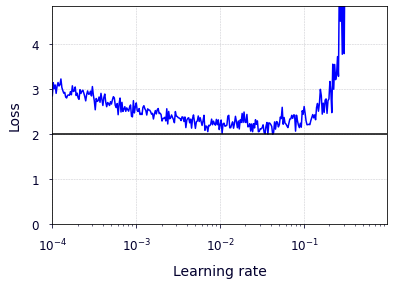

In [21]:
batch_size = 128
rates, losses = find_learning_rate(
    model, X_train_scaled, y_train, epochs=1, batch_size=batch_size
)
plot_lr_vs_loss(rates, losses)


In [22]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(
        tf.keras.layers.Dense(100, kernel_initializer="lecun_normal", activation="selu")
    )

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.SGD(learning_rate=2e-2)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)


In [23]:
n_epochs = 15
n_iterations = math.ceil(len(X_train_scaled) / batch_size) * n_epochs
onecycle = OneCycleScheduler(n_iterations, max_lr=0.05)
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=n_epochs,
    batch_size=batch_size,
    validation_data=(X_valid_scaled, y_valid),
    callbacks=[onecycle],
)


Epoch 1/15
352/352 [==============================] - 6s 13ms/step - loss: 2.0450 - accuracy: 0.2844 - val_loss: 1.8288 - val_accuracy: 0.3658
Epoch 2/15
352/352 [==============================] - 4s 12ms/step - loss: 1.7511 - accuracy: 0.3785 - val_loss: 1.6839 - val_accuracy: 0.4006
Epoch 3/15
352/352 [==============================] - 5s 13ms/step - loss: 1.6189 - accuracy: 0.4250 - val_loss: 1.6361 - val_accuracy: 0.4186
Epoch 4/15
352/352 [==============================] - 4s 13ms/step - loss: 1.5495 - accuracy: 0.4497 - val_loss: 1.6044 - val_accuracy: 0.4412
Epoch 5/15
352/352 [==============================] - 4s 12ms/step - loss: 1.4995 - accuracy: 0.4680 - val_loss: 1.6241 - val_accuracy: 0.4410
Epoch 6/15
352/352 [==============================] - 4s 12ms/step - loss: 1.4623 - accuracy: 0.4802 - val_loss: 1.5431 - val_accuracy: 0.4520
Epoch 7/15
352/352 [==============================] - 4s 12ms/step - loss: 1.4271 - accuracy: 0.4928 - val_loss: 1.5923 - val_accuracy: 0.4554

One cycle allowed us to train the model in just 15 epochs, each taking only 2 seconds (thanks to the larger batch size). This is several times faster than the fastest model we trained so far. Moreover, we improved the model's performance (from 50.7% to 52.0%).